In [241]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
os.chdir('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/GAP/gap')
from DataFolderFFHQ import DataFolder
from utils import preprocess, stats
from torchvision.transforms.functional import resize 
from PIL.Image import BICUBIC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
ffhq_path = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/ffhq/'
minPSNR = -40
maxPSNR = 30
dataset = DataFolder(root = ffhq_path, minPSNR = minPSNR, maxPSNR = maxPSNR, virtSize= 1)

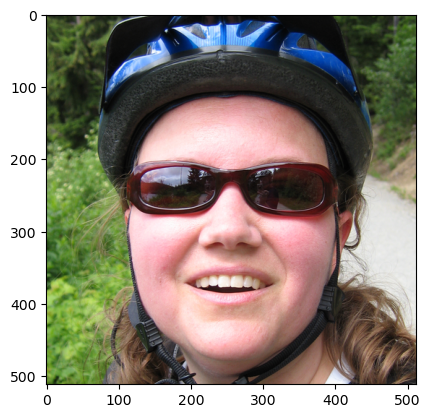

In [147]:
gt, img, imgNoise = dataset[0]
plt.imshow(preprocess(gt))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


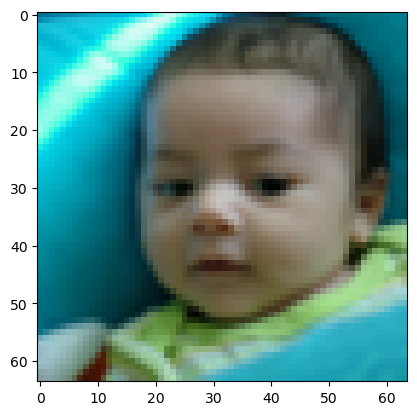

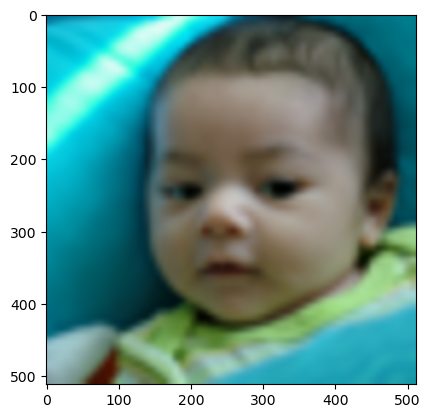

In [271]:
# resize16  = resize(8, BICUBIC, antialias= True)
# resize64  = resize(64, BICUBIC, antialias= True)
temp = preprocess(gt)
plt.figure()
plt.imshow((resize(img = temp.permute(2, 0, 1), size= 64, interpolation= BICUBIC, antialias= True).permute(1, 2, 0)))
plt.figure()
plt.imshow((resize(img = ((resize(img = temp.permute(2, 0, 1), size= 64, interpolation= BICUBIC, antialias= True).permute(1, 2, 0))).permute(2, 0, 1), size= 512, interpolation= BICUBIC, antialias= True)).permute(1, 2, 0))

In [268]:
from BinomDataset_ffhq_super_res import BinomDataset
ffhq_path = '/mnt/c/Users/ankit/Desktop/Msc AIML/Data/ffhq/faces/'
dataset = BinomDataset(root = ffhq_path, windowSize= 256, minPSNR = minPSNR, maxPSNR = maxPSNR, in_size = 64, out_size = 512)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

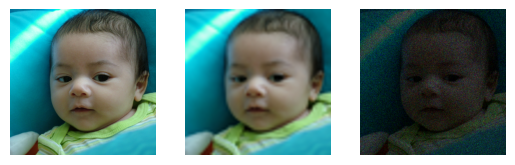

In [269]:
img = dataset[0]
target, gt, input = img[:3], img[3: 3 + 3], img[6:]
plt.subplot(1, 3, 1)
plt.imshow(preprocess(target))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(preprocess(gt))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(preprocess(input))
plt.axis('off')

In [108]:
stats(target, gt, input)


Shape : torch.Size([3, 512, 512])

Min : 0.0

Max : 2.3242008686065674

Sum : 786432.0

Mean : 1.0


Shape : torch.Size([3, 512, 512])

Min : -0.10363547503948212

Max : 2.303042411804199

Sum : 786432.0

Mean : 1.0


Shape : torch.Size([3, 512, 512])

Min : 0.0

Max : 5.0

Sum : 91321.0

Mean : 0.11612065881490707



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


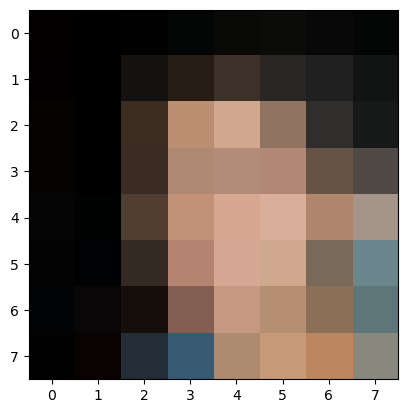

In [113]:
plt.imshow((resize(img = temp.permute(2, 0, 1), size= 8, interpolation= BICUBIC, antialias= True).permute(1, 2, 0)))


In [231]:
gt, _, _ = dataset[0]
regt = (resize(img = gt + 1e-3, size= 64, interpolation= BICUBIC, antialias= True))
def normalize(img):
    min = img.min()
    max = img.max()
    max_value = 255
    min_value = 0
    img = img - min
    img = img 
    return img
stats(normalize(regt), regt, gt)


Shape : torch.Size([3, 64, 64])

Min : 0.0

Max : 255.84475708007812

Sum : 1585583.5

Mean : 129.0351104736328


Shape : torch.Size([3, 64, 64])

Min : 2.517674446105957

Max : 258.3624267578125

Sum : 1616520.75

Mean : 131.55279541015625


Shape : torch.Size([3, 512, 512])

Min : 0.0

Max : 255.0

Sum : 103463264.0

Mean : 131.5603485107422



In [145]:
img = dataset[0]
img.shape

AttributeError: 'tuple' object has no attribute 'shape'